In [3]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

setwd("C:/Soongsil/R/Textmining")

In [4]:
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

### 01 SNS 언급량 추이 살펴보기
- 트윗 작성 날짜 및 후보자별 언급 빈도를 구합니다
- 선 그래프와 영역 차트를 마들어 추이를 살핌

In [5]:
bind_tweet <- bind_rows(
  read_csv("tweet_nak.csv") %>% mutate(candidate = "이낙연"),
  read_csv("tweet_jae.csv") %>% mutate(candidate = "이재명"))

glimpse(bind_tweet)

Rows: 5362 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): screen_name, text
dbl  (1): status_id
dttm (1): created_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8566 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): screen_name, text
dbl  (1): status_id
dttm (1): created_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 13,928
Columns: 5
$ status_id   <dbl> 1.296742e+18, 1.296737e+18, 1.296354e+18, 1.295243e+18, 1.~
$ screen_name <chr> "iloveabc0712", "park_pyung", "park_pyung", "park_pyung", ~
$ created_at  <dttm> 2020-08-21 09:33:09, 2020-08-21 09:13:52, 2020-08-20 07:5~
$ text        <chr> "@nylee21 @nylee_office 29일 전당대회 기다리고 있습니다. ~
$ candidate   <chr> "이낙연", "이낙연", "이낙연", "이낙연", "이낙연", "이낙연"~


In [7]:
library(lubridate)
library(textclean)

### ```replace_tag()``` : 사용자 ID 태그 제거
### ```replace_html()``` : html 태그 제거
### 어뷰징 트윗 제거 : 트위터에는 극단적으로 트윗을 많이 올리는 사용자가 존재, 이런 사용자가 작성한 트윗을 모두 포함시 분석 결과에 소수의 의견이 과도하게 반영

In [90]:
library(lubridate)
library(textclean)
library(stringr)

set.seed(1234)
tweet <- bind_tweet %>%

    mutate(text = replace_tag(str_to_lower(text)),  # id 태그 제거
         text = str_squish(replace_html(text)),   # html 특수 문자 제거
         date = date(created_at)) %>%             # 날짜 변수 생성

    filter(!str_detect(text, "https://")) %>%       # 광고 트윗 제거

    group_by(candidate) %>%                         # 중복 글 제거
    distinct(text, .keep_all = T) %>%
    ungroup()

In [91]:
tweet %>% glimpse

Rows: 9,055
Columns: 6
$ status_id   <dbl> 1.296742e+18, 1.296737e+18, 1.295243e+18, 1.295243e+18, 1.~
$ screen_name <chr> "iloveabc0712", "park_pyung", "park_pyung", "park_pyung", ~
$ created_at  <dttm> 2020-08-21 09:33:09, 2020-08-21 09:13:52, 2020-08-17 06:1~
$ text        <chr> "29일 전당대회 기다리고 있습니다. 이낙연 의원님께서 대표되~
$ candidate   <chr> "이낙연", "이낙연", "이낙연", "이낙연", "이낙연", "이낙연"~
$ date        <date> 2020-08-21, 2020-08-21, 2020-08-17, 2020-08-17, 2020-08-2~


### 트윗 빈도 추이

In [92]:
frequency_date <- tweet %>%
  count(date, candidate)

frequency_date %>% print

# A tibble: 18 x 3
   date       candidate     n
   <date>     <chr>     <int>
 1 2020-08-13 이낙연      293
 2 2020-08-13 이재명      691
 3 2020-08-14 이낙연      793
 4 2020-08-14 이재명     1259
 5 2020-08-15 이낙연      210
 6 2020-08-15 이재명      493
 7 2020-08-16 이낙연      321
 8 2020-08-16 이재명      536
 9 2020-08-17 이낙연      367
10 2020-08-17 이재명      460
11 2020-08-18 이낙연      657
12 2020-08-18 이재명      466
13 2020-08-19 이낙연      629
14 2020-08-19 이재명      338
15 2020-08-20 이낙연      312
16 2020-08-20 이재명      551
17 2020-08-21 이낙연      143
18 2020-08-21 이재명      536


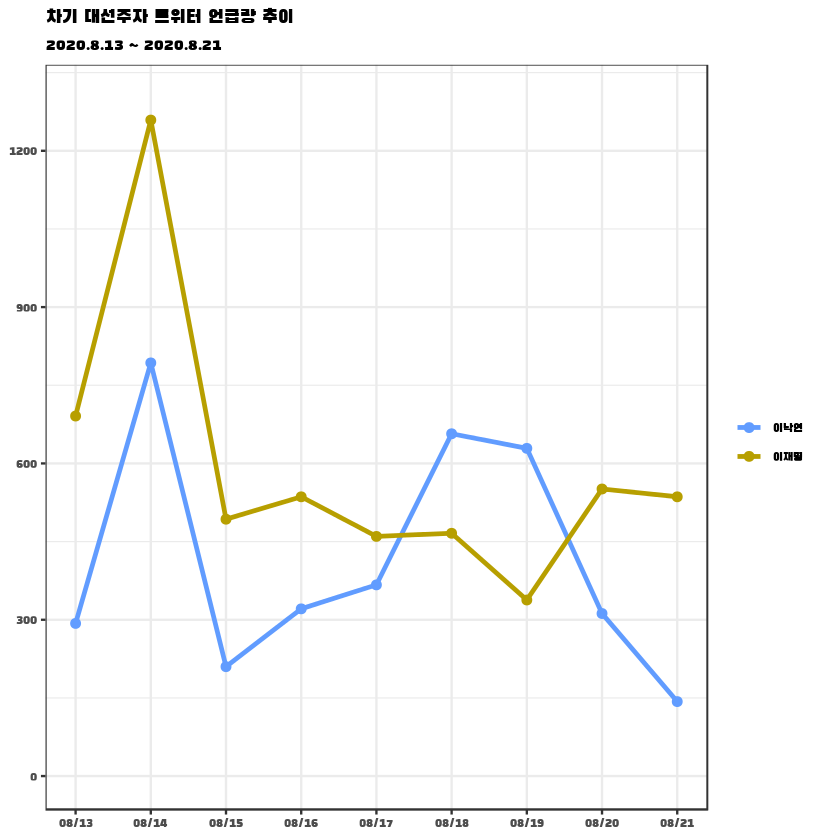

In [93]:
col_candidate <- c("#619CFF", "#B79F00")

ggplot(frequency_date, aes(x = date, y = n, col = candidate)) +  
  geom_line(size = 1) +
  geom_point(size = 2) +
  
  scale_x_date(date_labels = "%m/%d",                         # x축 날짜 포맷
               date_breaks  = "1 day") +                      # x축 날짜 간격
  scale_y_continuous(limits = c(0, 1300),                     # y축 범위
                     breaks = seq(0, 1200, 300)) +            # y축 간격
  scale_color_manual(values = col_candidate) +                # 선 색깔
  
  labs(title = "차기 대선주자 트위터 언급량 추이",            # 그래프 제목
       subtitle = "2020.8.13 ~ 2020.8.21",                    # 보조 제목
       x = NULL, y = NULL, col = NULL) +                      # 축 이름 삭제

  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),  # 제목 폰트
        plot.subtitle = element_text(size = 12),              # 부제목 폰트
        panel.grid.minor.x = element_blank()) 

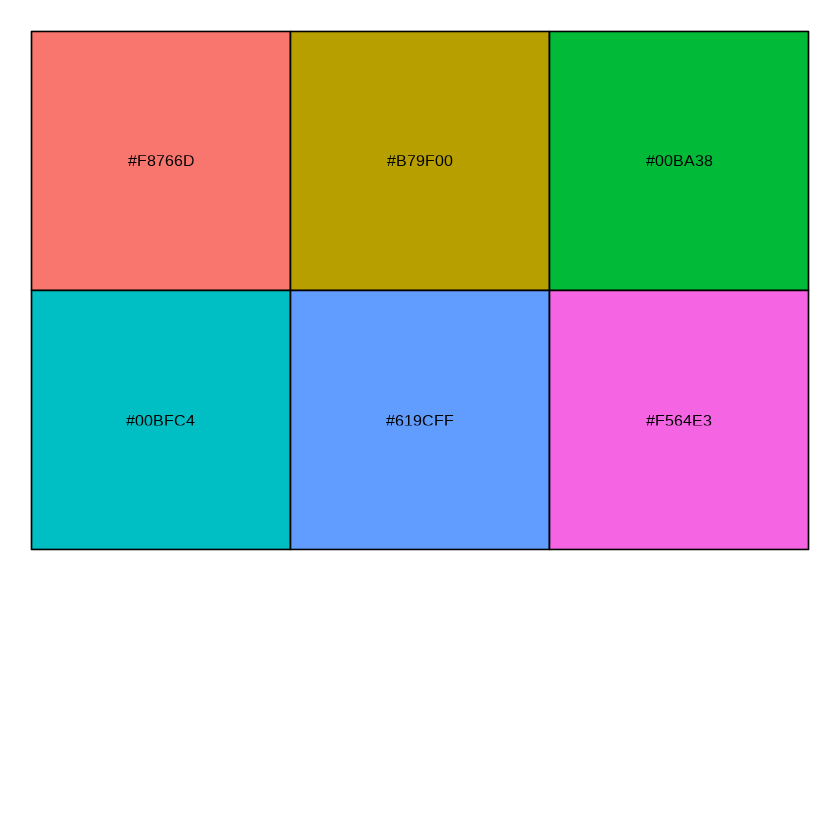

In [94]:
library(scales)
show_col(hue_pal()(6))

**트윗 빈도 추이 영역 차트**
### ```geom_area()```

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"


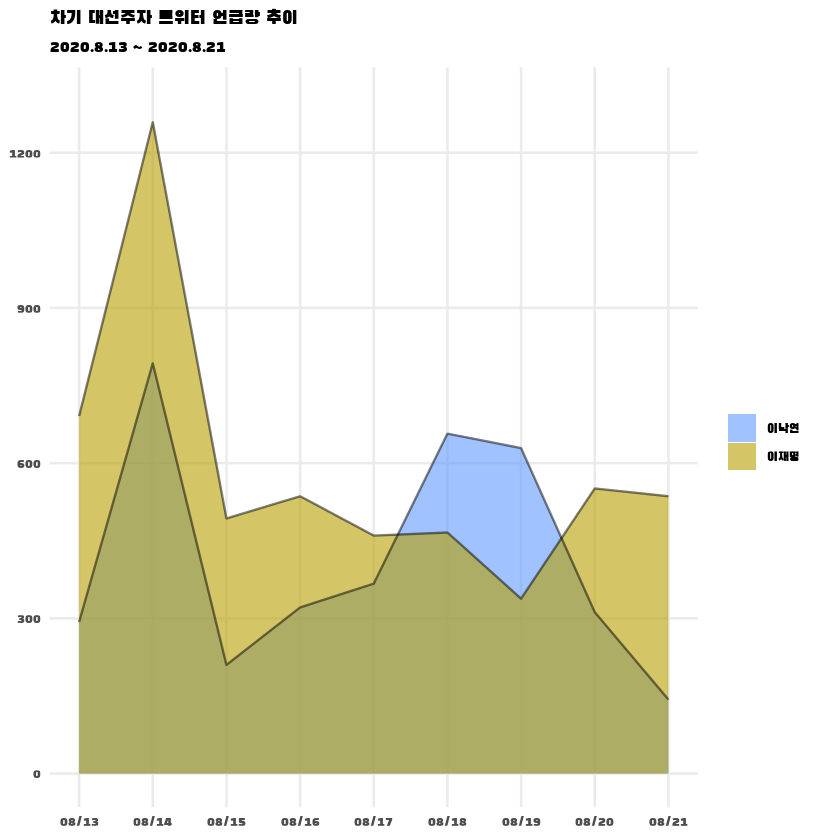

In [95]:
ggplot(frequency_date, aes(x = date, y = n, fill = candidate)) +
  geom_area(position = "dodge", alpha = 0.6) +
  geom_line(size = 0.5, alpha = 0.5) +
  
  scale_x_date(date_labels = "%m/%d", date_breaks  = "1 day") +
  scale_y_continuous(limits = c(0, 1300),
                     breaks = seq(0, 1200, 300)) +
  scale_fill_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 트위터 언급량 추이",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, fill = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),            
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank())  # y축 보조축 삭제


### 02 SNS이슈 알아보기
- 관심 날짜와 그 외 날짜의 단어 빈도를 계산
- 로그 오즈비를 이용해 관심 날짜에 상대적으로 많이 사용된 단어를 추출
- 트윗의 내용을 살펴보고 관심 날짜에 무슨 일이 있었는지 탐색

In [96]:
library(tidytext)
library(KoNLP)

Checking user defined dictionary!




In [97]:
word_tweet_raw <- tweet %>%
  unnest_tokens(input = text,
                output = word,
                token = "words",
                drop = F)

In [98]:
frequency14 <- word_tweet_raw %>%
  mutate(category = ifelse(date == "2020-08-14", "target", "etc")) %>%
  filter(str_count(word) >= 2) %>%
  count(category, word, sort = T)

frequency14 %>% print

# A tibble: 62,567 x 3
   category word         n
   <chr>    <chr>    <int>
 1 etc      이낙연    2332
 2 etc      이재명    2282
 3 target   이재명     854
 4 target   이낙연     736
 5 etc      이재명이   679
 6 etc      이재명은   534
 7 etc      코로나     453
 8 etc      정세균     440
 9 etc      나라가     428
10 etc      민주당     419
# ... with 62,557 more rows


**로그 오즈비**

In [99]:
# Wide form으로 변환
library(tidyr)
wide14 <- frequency14 %>%
  pivot_wider(names_from = category,
              values_from = n,
              values_fill = list(n = 0))

In [100]:
# 로그 오즈비 변수 추가
wide14 <- wide14 %>%
  mutate(log_odds_ratio = log(((target + 1) / (sum(target + 1))) /
                                ((etc  + 1) / (sum(etc    + 1)))))

In [102]:
# log_odds_ratio 높은 순 출력
wide14 %>%
  arrange(-log_odds_ratio) %>%
  head(20) %>% print

# A tibble: 20 x 4
   word           etc target log_odds_ratio
   <chr>        <int>  <int>          <dbl>
 1 가치인           0     18           3.58
 2 고귀한           0     18           3.58
 3 공직자다         0     14           3.34
 4 영남출신으로     0     14           3.34
 5 필승카드다       0     14           3.34
 6 정치인이다       1     22           3.08
 7 조사기관         0     10           3.03
 8 불의에           1     20           2.98
 9 댓방             0      9           2.94
10 지지층에서는     0      9           2.94
11 역선택           1     18           2.88
12 높게             0      8           2.83
13 차기선호도       0      8           2.83
14 대동사회를       1     16           2.77
15 이재멍           0      7           2.71
16 조국장관을       0      7           2.71
17 참된             1     14           2.65
18 권력찬탈         0      6           2.58
19 나가지           0      6           2.58
20 떨어지는데       0      6           2.58


**원문 확인**

In [104]:
# 트윗 내용 확인
tweet %>%
  filter(date == "2020-08-14" & str_detect(text, "조사")) %>%
  head(10) %>%
  pull(text) %>% print

 [1] "민주당 권리당원 비율 호남29%(인구500만) 경기20% 서울20% 갤럽 호남 이낙연 7월43% 8월45% 유보층 30%대 찢재명 7월14% 8월17% 찢재명 지난 대선경선에서 호남에서 20%가까이 득표함 여론조사는지난번 보다 못함 이낙연은 문프 안희정 표를 합친 80%전후 득표 예상 찢재명은 호남이 통곡벽"        
 [2] "호남이 이낙연총리 45~50% 사이에서 지지하는건 김대중 대통령때 지지 패턴과 비슷함 노골적인 지지가 역풍을 초래한다는 학습효과 때문에 여론조사와 실제득표가(20%가량) 갭이 있음 97년 dj 실제 호남 평균득표율 95%였음 이낙연이 실제 경선에 들어가면 호남은 7~80% 수준의 지지 예상할 수 있음" 
 [3] "오늘 정치신세계에서 이낙연 의원님 말씀들 언론 많이 노출될 수 있게 노력좀 하세요 지지율이란거 문항설계나 조사기관 의향 반영되는거 모르는 거 아니지만, 언플 대마왕 이재명이 민주당지지율 내려간게 새로운 기대가 있느니 마니 얘기한거 그냥 한거 아닐거에요 정신 바짝 차리세요"            
 [4] "맞네요. 이때는 투표날 전 마지막 여론 조사 결과여서 진짜 심장쫄였던 기억이 있네요. 이재명 역전극도, 보름후 이낙연의원님 당대표 선출 전까지는 계속 유지 될거라 봅니다."                                                                                                                  
 [5] "이낙연 지지자들은 친정부파를 윤석열 지지자들은 반정부파를 대표함. 그런데 이재명 지지자들은 좀 애매모호함. 그러나 여론조사와 달리 이재명은 민주당 내부에서 비토정서가 강하고, 대통령이 될 가능성은 적음. 결국 이재명 지지자들도 이낙연 지지자들과 윤석열 지지자들로 나뉠 가능성이 높음."
 [6] "벵이 지지율19% 이낙연 지지율 17% ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 대선 선호도 조사...역전 이란다 

### 18 ~ 19일 이슈

In [105]:
frequency_nak1819 <- word_tweet_raw %>%
  mutate(category = ifelse(date >= "2020-08-18" &
                           date <= "2020-08-19", "target", "etc")) %>%
  filter(candidate == "이낙연" & str_count(word) >= 2) %>%
  count(category, word, sort = T)

In [107]:
# Wide form으로 변환
wide_nak1819 <- frequency_nak1819 %>%
  pivot_wider(names_from = category,
              values_from = n,
              values_fill = list(n = 0))

# 로그 오즈비 변수 추가
wide_nak1819 <- wide_nak1819 %>%
  mutate(log_odds_ratio = log(((target + 1) / (sum(target + 1))) /
                                ((etc  + 1) / (sum(etc    + 1)))))


# log_odds_ratio 높은 순 출력
wide_nak1819 %>%
  arrange(-log_odds_ratio) %>%
  head(20) %>% print

# A tibble: 20 x 4
   word         etc target log_odds_ratio
   <chr>      <int>  <int>          <dbl>
 1 다행입니다     0     41           4.21
 2 음성판정       0     39           4.16
 3 cbs            3    129           3.95
 4 마이크         0     29           3.87
 5 음성           4    138           3.80
 6 무탈하시길     0     23           3.65
 7 아무일         0     15           3.25
 8 밤새           0     14           3.18
 9 확진자가       0     13           3.11
10 검사결과       0     12           3.04
11 기도합니다     0     12           3.04
12 무사하시길     0     11           2.96
13 차명진         0     11           2.96
14 판정           2     33           2.90
15 잠이           0     10           2.87
16 ㅜㅜ           2     30           2.81
17 김정훈         0      9           2.78
18 소식에         0      9           2.78
19 마이크를       1     17           2.67
20 몸이           0      8           2.67


In [108]:
# 트윗 내용 확인
tweet %>%
  filter(date >= "2020-08-18" & date <= "2020-08-19" &
         candidate == "이낙연" & str_detect(text, "다행입니다")) %>%
  head(10) %>%
  pull(text) %>% print

 [1] "다행입니다 조마 조마하면 가슴 졸였을 수 많은 사람들과 음성 나오길 기도 드린 여러분들이 계시기에 고맙습니다 자가격리 잘하십시요 간간히 소식 올려주시구요~^^ 이낙연 의원님 건강하셔서 감사합니다"                                        
 [2] "정말 다행입니다! 이낙연 의원님 앞으로 더더욱 건강 조심하세요"                                                                                                                                                                          
 [3] "사랑해요 이낙연의원님!!!!! 다행입니다 ㅠㅠㅠㅠ 건강하세요 항상응원합니다"                                                                                                                                                              
 [4] "첨 다행입니다 더욱더 조심하시길요 이낙연 국회의원님 당대표 꼭 되셔서 사람사는세상을 만들어 주세요 지지응원합니다 힘내세요"                                                                                                             
 [5] "이낙연 의원님! 건강이 최우선 입니다. 건강을 잃으면 아무 것도 할수 없습니다. 그래도 확진이 아니라서 정말 다행입니다. 항상 응원 하겠습니다."                                                                                             
 [6] "이낙연 의원님 정말 다행입니다 그러나 앞으로는 방송 출연하지 마시고 전화나 방역 확인된 곳에 녹화

### 03 감정 단어 살펴보기
- 트윗에 감정 점수를 부여한 다음 가정 범주로 분류
- 감정 범주별로 자주 언급한 단어를 추출해 그래프

In [109]:
# 감정 사전 불러오기
dic <- read_csv("knu_sentiment_lexicon.csv")

# 감정 점수 부여, 감정 극성 분류
word_tweet <- word_tweet_raw %>%
  left_join(dic, by = "word") %>%                              # 감정 점수 부여
  mutate(polarity = ifelse(is.na(polarity), 0, polarity),      # NA를 0으로 변환
         sentiment = ifelse(polarity ==  2, "긍정",            # 감정 범주 분류
                     ifelse(polarity == -2, "부정", "중립")))

Rows: 14854 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): word
dbl (1): polarity

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [110]:
# 자주 언급한 단어 추출
top10_word <- word_tweet %>%

  # 불용어 제거
  filter(!(candidate == "이낙연" & str_detect(word, "이낙연")) &
         !(candidate == "이재명" & str_detect(word, "이재명"))) %>%

  filter(str_count(word) >= 2) %>%
  count(candidate, sentiment, word) %>%

  group_by(candidate, sentiment) %>%
  slice_max(n, n = 10, with_ties = F)

top10_word %>% print

# A tibble: 60 x 4
# Groups:   candidate, sentiment [6]
   candidate sentiment word         n
   <chr>     <chr>     <chr>    <int>
 1 이낙연    긍정      좋은        34
 2 이낙연    긍정      바람직한    12
 3 이낙연    긍정      좋다        12
 4 이낙연    긍정      소중한      11
 5 이낙연    긍정      최고        11
 6 이낙연    긍정      고귀한       9
 7 이낙연    긍정      많다         9
 8 이낙연    긍정      훌륭한       9
 9 이낙연    긍정      감사         8
10 이낙연    긍정      좋아하는     8
# ... with 50 more rows


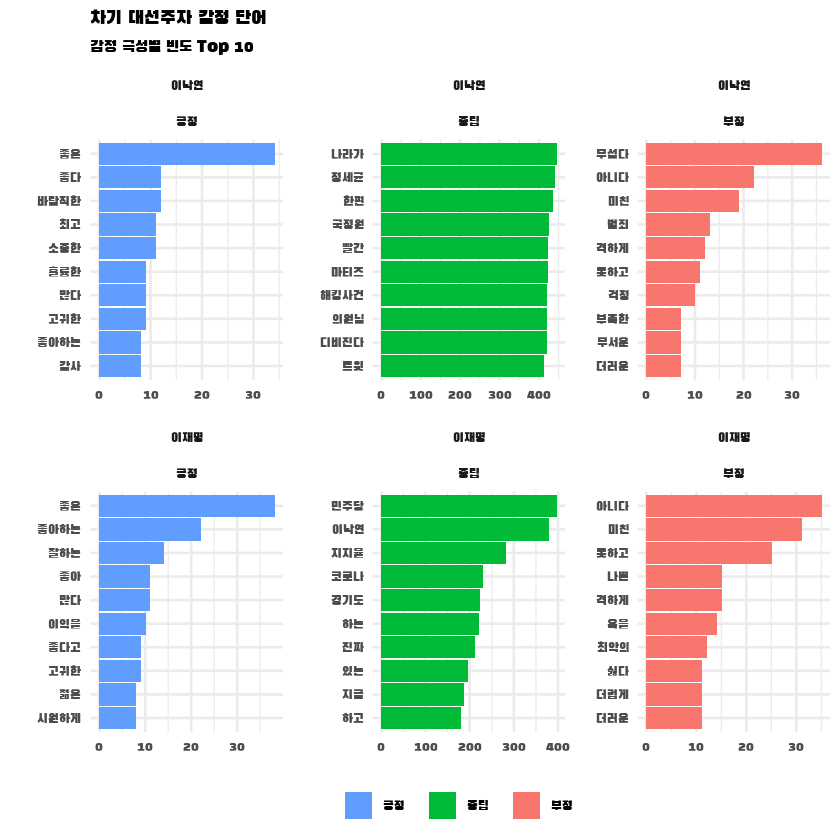

In [111]:
col_sentiment <- c("#619CFF", "#00BA38", "#F8766D")  # 감정 색깔 목록
order_sentiment <- c("긍정", "중립", "부정")         # 감정 범주 목록

# 그래프 순서 지정
top10_word$sentiment <- factor(top10_word$sentiment,
                               levels = order_sentiment)

ggplot(top10_word, aes(x = reorder_within(word, n, candidate),
                       y = n,
                       fill = sentiment)) +
  geom_col() +
  coord_flip() +
  facet_wrap(candidate ~ sentiment,
             scales = "free") +
  scale_x_reordered() +
  scale_fill_manual(values = col_sentiment) +
  
  labs(title = "차기 대선주자 감정 단어",
       subtitle = "감정 극성별 빈도 Top 10",
       x = NULL, y = NULL, fill = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        legend.position = "bottom")  # 범례 위치

### 04 감정 경향 살펴보기
- 트윗의 감정 점수로 히스토그램과 확률 밀도 함수 그래프를 만들어 분포를 탐색
- 확률 밀도 함수 그래프를 날짜별로 만들어 트윗의 감정 점수 분포가 날짜에 따라 어떻게 다른지 탐색
- 감정 범주별 빈도와 비율을 막대 그래프로 만들어 어떤 감정을 담은 트윗이 많은지 탐색

In [112]:
# 트윗 감정 점수 구하기
sentiment_tweet <- word_tweet %>%
  group_by(candidate, status_id) %>%
  summarise(score = sum(polarity)) %>%
  ungroup()

`summarise()` has grouped output by 'candidate'. You can override using the `.groups` argument.


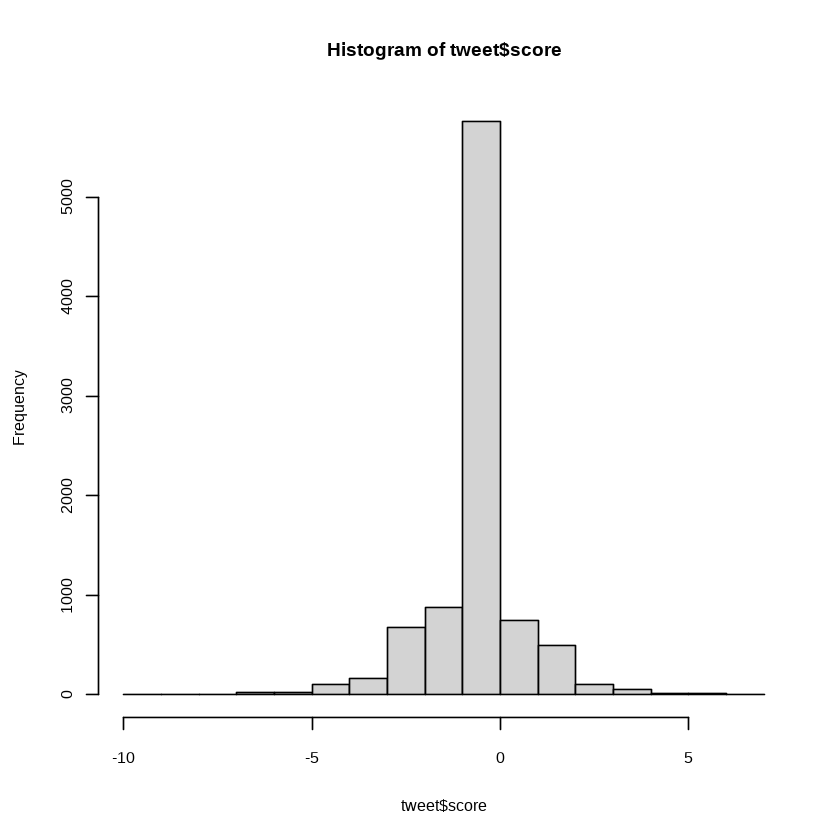

In [113]:
# 트윗 원문에 감정 점수 결합
tweet <- tweet %>%
  left_join(sentiment_tweet, by = c("candidate", "status_id"))

# 감정 점수 히스토그램
hist(tweet$score)

Warning message:
"Removed 34 rows containing non-finite values (stat_density)."


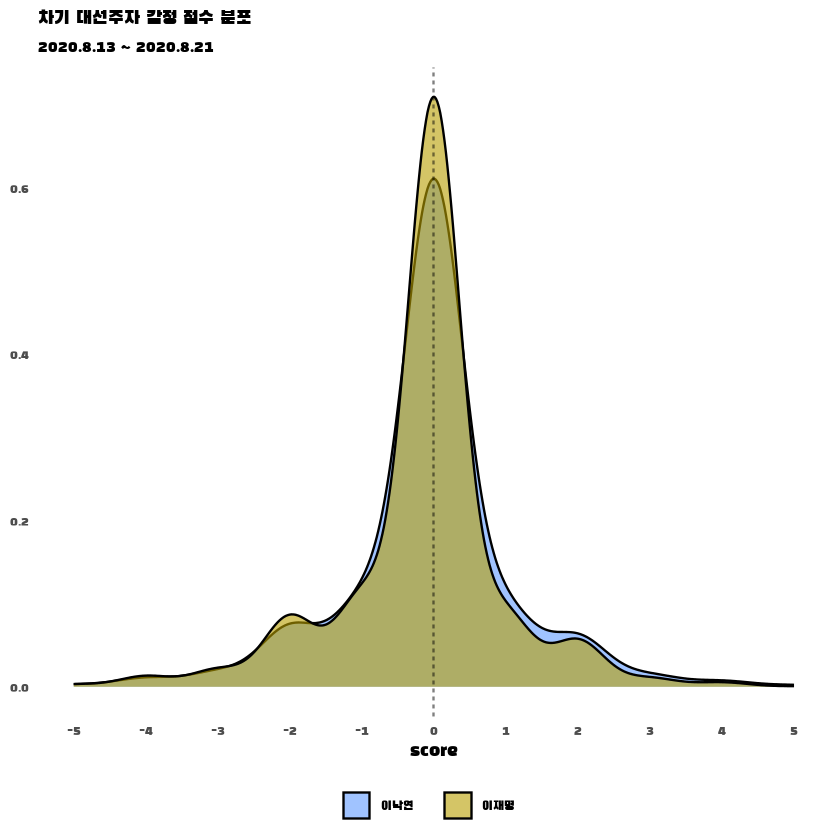

In [114]:
ggplot(tweet, aes(x = score, fill = candidate)) +
  geom_density(adjust = 2, alpha = 0.6) +
  geom_vline(xintercept = 0,                   # 0점 위 세로선 표시
             linetype = "dashed",              # 점선 표시
             size = 0.5,
             alpha = 0.5) +
  
  scale_x_continuous(breaks = c(-5:5),         # x축 범위
                     limits = c(-5, 5)) +      # x축 간격
  scale_fill_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 감정 점수 분포",
       subtitle = "2020.8.13 ~ 2020.8.21",
       y = NULL, fill = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        legend.position = "bottom",
        panel.grid = element_blank())          # 격자

### 일자별 확률 밀도 함수 그래프

Warning message:
"Removed 34 rows containing non-finite values (stat_density)."


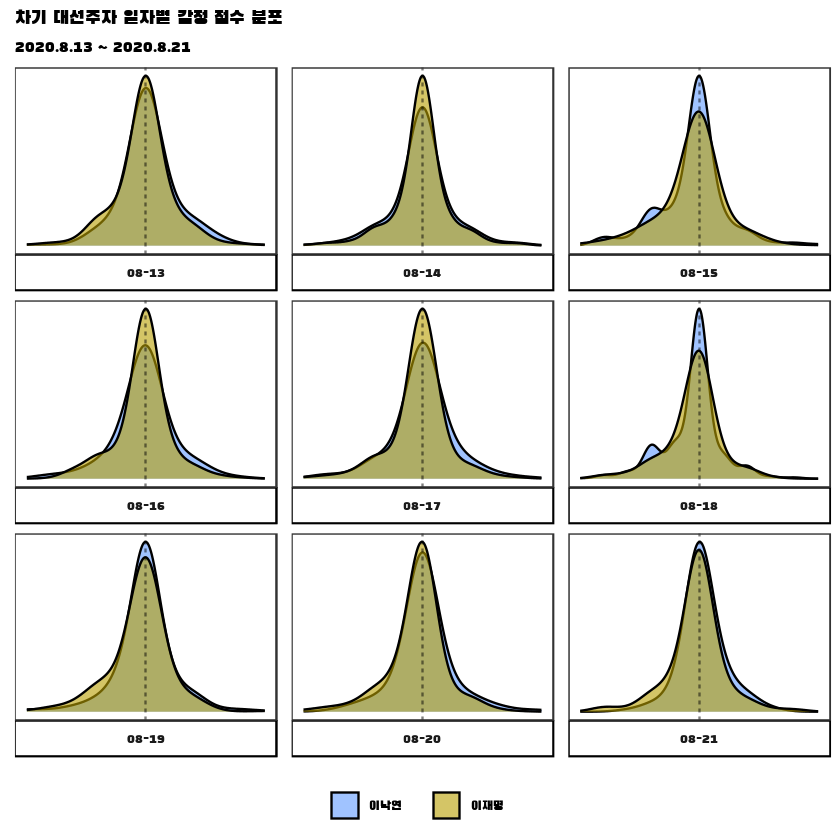

In [115]:
ggplot(tweet, aes(x = score, fill = candidate)) +
  geom_density(adjust = 2,
               alpha = 0.6) +
  
  geom_vline(xintercept = 0,
             linetype = "dashed",
             size = 0.5,
             alpha = 0.5) +
  
  facet_wrap(~ str_remove(date, "2020-"),                  # x축 년도 삭제
             scales = "free_y",
             ncol = 3,
             strip.position = "bottom") +
  
  scale_x_continuous(breaks = c(-5:5),
                     limits = c(-5, 5)) +
  scale_fill_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 일자별 감정 점수 분포",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, fill = NULL) +

  theme_bw(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        legend.position = "bottom",
        panel.grid = element_blank(),
        axis.ticks = element_blank(),                      # 축 눈금 삭제
        axis.text = element_blank(),                       # 축 삭제
        strip.background = element_rect(colour = "black",  # 패널명 배경
                                        fill = "white"))  

### 감정 범주 탐색

In [116]:
# 감정 분류 변수 생성
tweet <- tweet %>%
  mutate(sentiment = ifelse(score >= 1, "긍정",
                     ifelse(score <= -1, "부정", "중립")))

# 후보, 감정별 빈도 및 비율
frequency_sentiment <- tweet %>%
  group_by(candidate) %>%
  count(sentiment) %>%
  mutate(ratio = n/sum(n))

frequency_sentiment %>% print

# A tibble: 6 x 4
# Groups:   candidate [2]
  candidate sentiment     n ratio
  <chr>     <chr>     <int> <dbl>
1 이낙연    긍정        650 0.174
2 이낙연    부정        754 0.202
3 이낙연    중립       2321 0.623
4 이재명    긍정        768 0.144
5 이재명    부정       1121 0.210
6 이재명    중립       3441 0.646


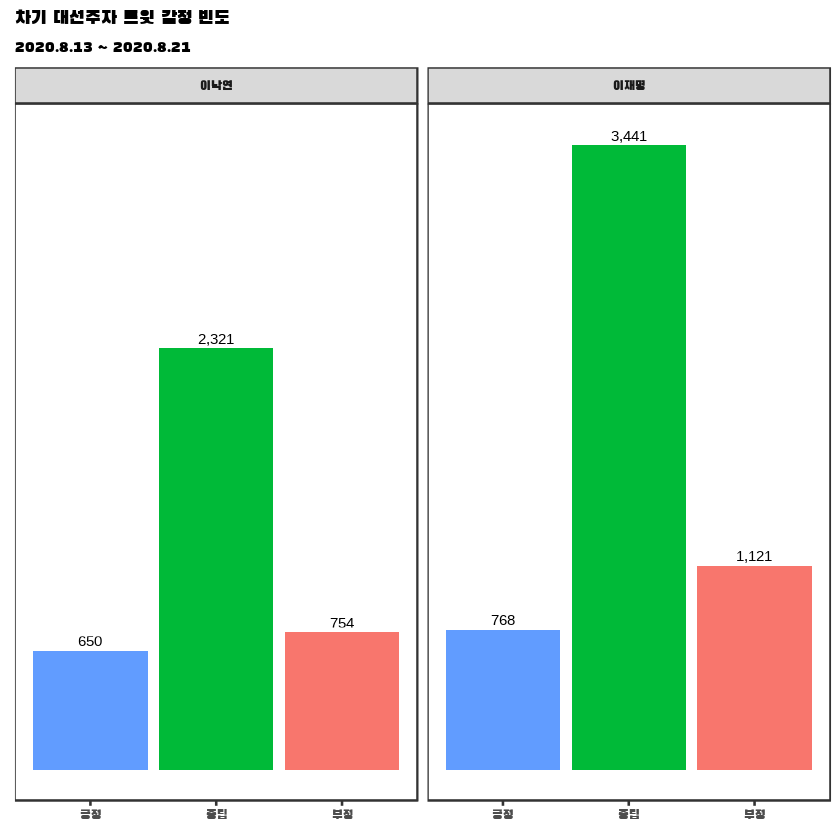

In [118]:
frequency_sentiment$sentiment <- factor(frequency_sentiment$sentiment,
                                        levels = order_sentiment)

library(scales)
ggplot(frequency_sentiment, aes(x = sentiment, y = n, fill = sentiment)) +
  geom_col(show.legend = F) +                   
  facet_wrap(~ candidate) +
  geom_text(aes(label = comma(n)), vjust = -0.5) +
  
  ylim(0, 3500) +
  scale_fill_manual(values = col_sentiment) +  # 막대 색깔
  
  labs(title = "차기 대선주자 트윗 감정 빈도",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL) +
  
  theme_bw(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12), 
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        panel.grid = element_blank())

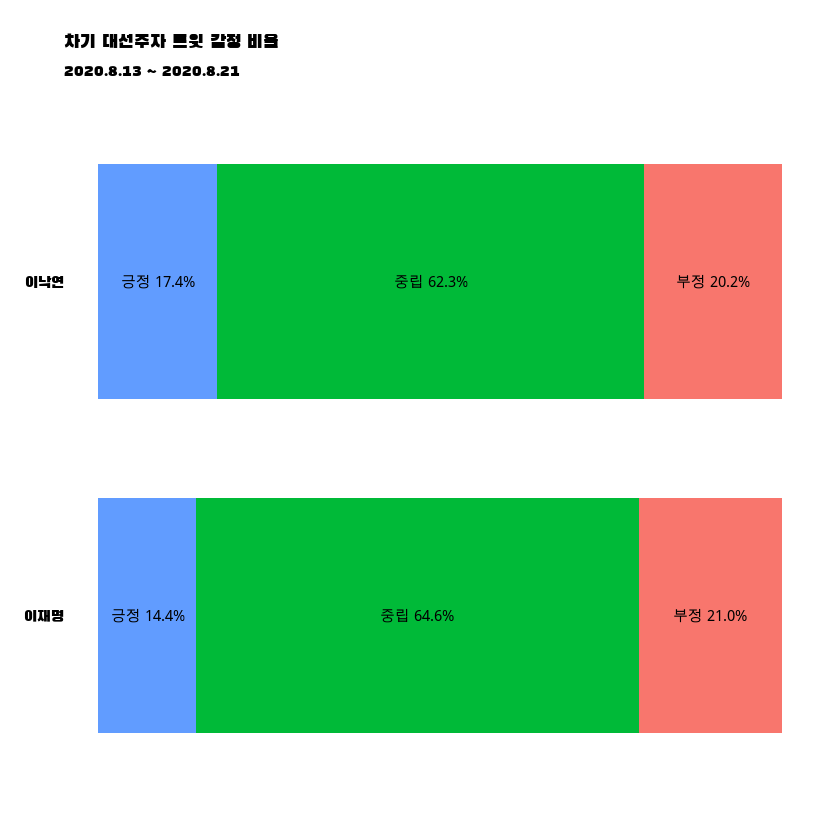

In [119]:
frequency_sentiment$sentiment <- factor(frequency_sentiment$sentiment,
                                        levels = rev(order_sentiment))

ggplot(frequency_sentiment, aes(x = candidate, y = ratio, fill = sentiment)) +
  geom_col(show.legend = F, width = 0.7) +
  
  geom_text(aes(label = paste(sentiment, percent(ratio, accuracy = 0.1))),
            position = position_stack(vjust = 0.5)) +     # 수직 위치
  coord_flip() +
  scale_x_discrete(limits = c("이재명", "이낙연")) +
  
  labs(title = "차기 대선주자 트윗 감정 비율",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, fill = NULL) +
  
  theme_void(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        legend.position = "bottom",
        axis.text.y = element_text(size = 12),            # y축 글자 크기
        plot.margin = margin(1, 1, 1, 1, unit = "line"))  # 여백 상우하좌, 단위

### 05 감정 추이 살펴보기
- 날짜, 후보, 감정 범주별로 트윗의 빈도를 계산
- 선 그래프와 영역 차트를 만들어 추이를 탐색

In [121]:
# 날짜, 후보, 감정별 빈도
sentiment_candidate <- tweet %>%
  count(date, candidate, sentiment)

sentiment_candidate %>% print

# A tibble: 54 x 4
   date       candidate sentiment     n
   <date>     <chr>     <chr>     <int>
 1 2020-08-13 이낙연    긍정         62
 2 2020-08-13 이낙연    부정         44
 3 2020-08-13 이낙연    중립        187
 4 2020-08-13 이재명    긍정        126
 5 2020-08-13 이재명    부정        153
 6 2020-08-13 이재명    중립        412
 7 2020-08-14 이낙연    긍정        145
 8 2020-08-14 이낙연    부정        161
 9 2020-08-14 이낙연    중립        487
10 2020-08-14 이재명    긍정        207
# ... with 44 more rows


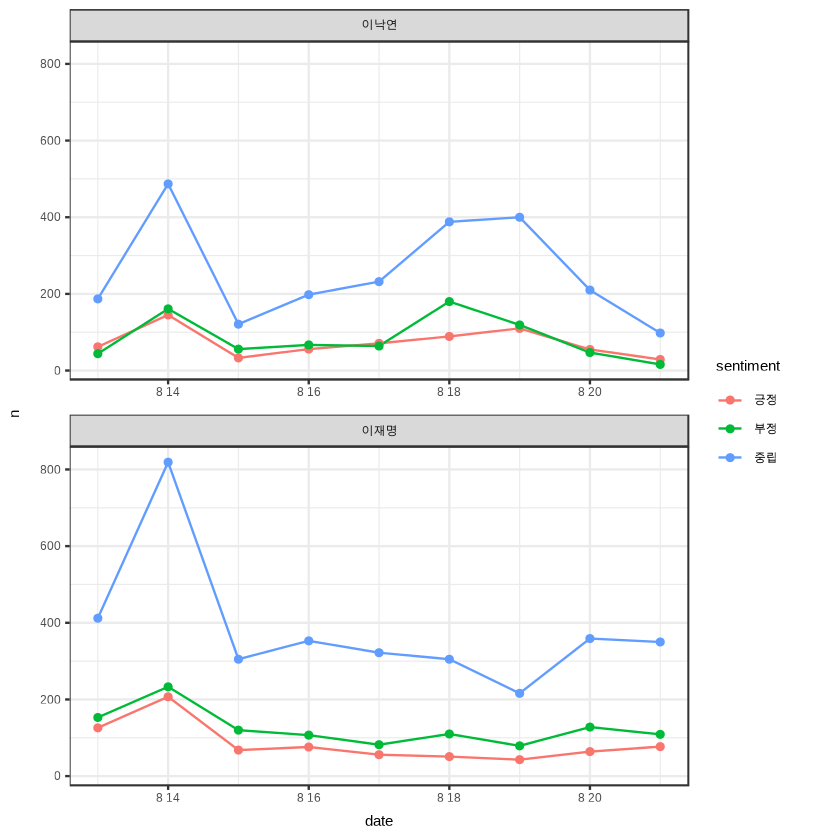

In [122]:
## 트윗 감정 추이 선 그래프
ggplot(sentiment_candidate, aes(x = date, y = n, col = sentiment)) +
  geom_line() +
  geom_point() +
  facet_wrap(~ candidate, nrow = 2, scales = "free_x")

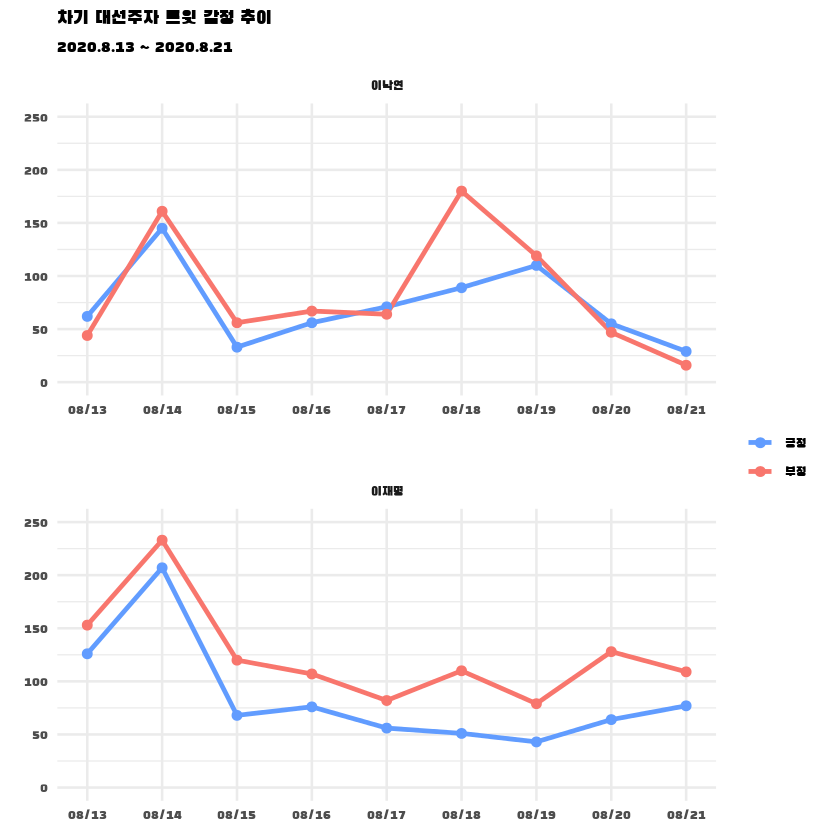

In [124]:
# 중립 트윗 제외
col_polar <- c("#619CFF", "#F8766D")

ggplot(tweet_polar, aes(x = date, y = n, col = sentiment)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  facet_wrap(~ candidate, nrow = 2, scales = "free_x") +
  
  scale_x_date(date_labels = "%m/%d",
               date_breaks  = "1 day") +
  ylim(0, 250) +
  scale_color_manual(values = col_polar) +
  
  labs(title = "차기 대선주자 트윗 감정 추이",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, col = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        panel.grid.minor.x = element_blank(),
        panel.spacing = unit(2, "lines"))  # 그래프 간격

### 트윗 감정 추이 영역 차트

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"


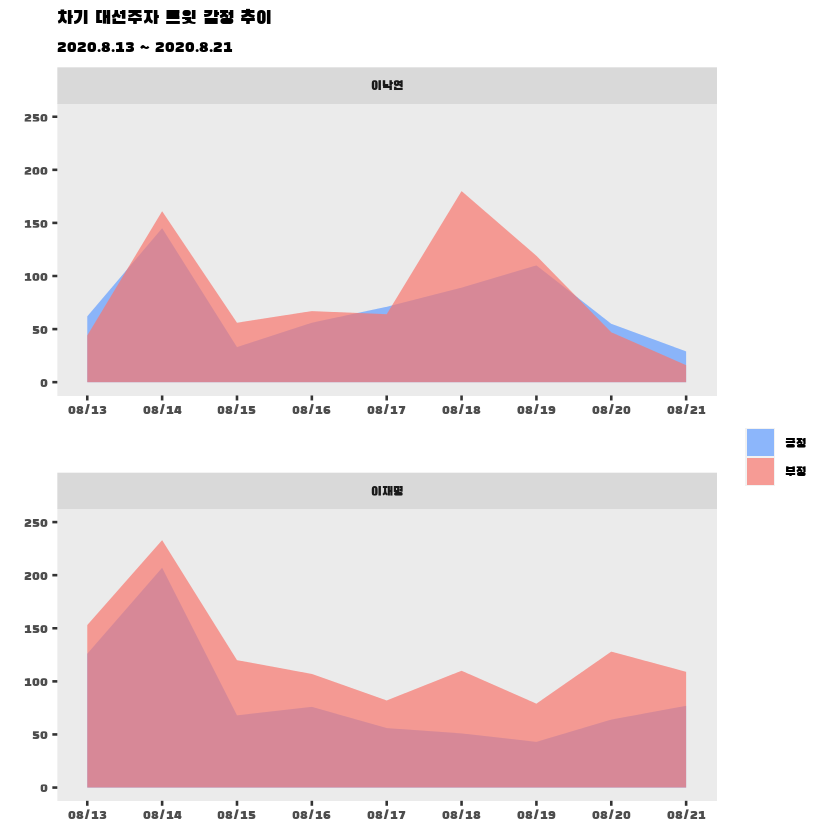

In [125]:
ggplot(tweet_polar, aes(x = date, y = n, fill = sentiment)) +
  geom_area(position = "dodge", alpha = 0.7) +
  facet_wrap(~ candidate, nrow = 2, scales = "free_x") +
  
  scale_x_date(date_labels = "%m/%d", date_breaks  = "1 day") +
  ylim(0, 250) +
  scale_fill_manual(values = col_polar) +
  
  labs(title = "차기 대선주자 트윗 감정 추이",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, fill = NULL) +
  
  theme_gray(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12), 
        panel.grid = element_blank(),
        panel.spacing = unit(2, "lines"))  # 그래프 간격 띄우기

### 06 긍정, 부정 트윗 단어 비교
- 감정 범주 미 단어별 빈도
- 로그 오즈비를 구한 다음 두 후보자의 주요 긍정 단어와 부정 단어 추출
- 막대 그래프와 롤리팝 차트를 만들어 주요 단어 비교

In [126]:
# 두 글자 이상 한글 단어 추출
word_sentiment_tweet <- word_tweet_raw %>%
  filter(str_detect(word, "[가-힣]") &
         str_count(word) >= 2) %>%

  # tweet 결합
  left_join(tweet %>% select(candidate, status_id, score, sentiment),
            by = c("candidate", "status_id"))

glimpse(word_sentiment_tweet)

Rows: 157,301
Columns: 9
$ status_id   <dbl> 1.296742e+18, 1.296742e+18, 1.296742e+18, 1.296742e+18, 1.~
$ screen_name <chr> "iloveabc0712", "iloveabc0712", "iloveabc0712", "iloveabc0~
$ created_at  <dttm> 2020-08-21 09:33:09, 2020-08-21 09:33:09, 2020-08-21 09:3~
$ text        <chr> "29일 전당대회 기다리고 있습니다. 이낙연 의원님께서 대표되~
$ candidate   <chr> "이낙연", "이낙연", "이낙연", "이낙연", "이낙연", "이낙연"~
$ date        <date> 2020-08-21, 2020-08-21, 2020-08-21, 2020-08-21, 2020-08-2~
$ word        <chr> "전당대회", "기다리고", "있습니다", "이낙연", "의원님께서"~
$ score       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1,~
$ sentiment   <chr> "긍정", "긍정", "긍정", "긍정", "긍정", "긍정", "긍정", "~


In [127]:
# 감정 범주 및 단어별 빈도 구하기
frequency_sentiment <- word_sentiment_tweet %>%  

  group_by(status_id) %>%                        # 트윗별 분리
  distinct(word, .keep_all = T) %>%              # 중복 단어 제거
  ungroup() %>%

  count(candidate, sentiment, word, sort = T)

frequency_sentiment %>% print

# A tibble: 76,330 x 4
   candidate sentiment word         n
   <chr>     <chr>     <chr>    <int>
 1 이낙연    중립      이낙연    1486
 2 이재명    중립      이재명    1457
 3 이낙연    부정      이낙연     532
 4 이재명    부정      이재명     495
 5 이재명    중립      이재명이   482
 6 이낙연    긍정      이낙연     428
 7 이재명    중립      이재명은   351
 8 이재명    긍정      이재명     319
 9 이낙연    중립      정세균     252
10 이낙연    중립      나라가     244
# ... with 76,320 more rows


In [128]:
# Wide form으로 변환
wide_pos <- frequency_sentiment %>%
  filter(sentiment == "긍정" & !str_detect(word, "이낙연|이재명")) %>%
  pivot_wider(names_from = candidate,
              values_from = n,
              values_fill = list(n = 0))

# 로그 오즈비 구하기
log_odds_pos <- wide_pos %>%
  mutate(log_odds_ratio = log(((이낙연 + 1) / (sum(이낙연 + 1))) /
                              ((이재명 + 1) / (sum(이재명 + 1)))))

In [129]:
# 불용어 확인
log_odds_pos %>%
  group_by(candidate = ifelse(log_odds_ratio > 0, "이낙연", "이재명")) %>%
  slice_max(abs(log_odds_ratio), n = 15, with_ties = F) %>%
  select(word) %>%
  print(n = Inf)

# 불용어 목록 생성
stopword_pos <- c("것이고", "그건", "그는")

Adding missing grouping variables: `candidate`


# A tibble: 30 x 2
# Groups:   candidate [2]
   candidate word        
   <chr>     <chr>       
 1 이낙연    한편        
 2 이낙연    국정원      
 3 이낙연    마티즈      
 4 이낙연    빨간        
 5 이낙연    해킹사건    
 6 이낙연    디비진다    
 7 이낙연    연루된      
 8 이낙연    참고        
 9 이낙연    황교안      
10 이낙연    메인        
11 이낙연    서훈        
12 이낙연    긴급체포된다
13 이낙연    이병호      
14 이낙연    등이        
15 이낙연    트윗        
16 이재명    경기도      
17 이재명    이익을      
18 이재명    돈을        
19 이재명    그건        
20 이재명    기본소득    
21 이재명    돈이        
22 이재명    박원순      
23 이재명    강하게      
24 이재명    공지영      
25 이재명    기본소득을  
26 이재명    살아        
27 이재명    아직도      
28 이재명    어디        
29 이재명    문파를      
30 이재명    시장        


In [130]:
# 로그 오즈비 상하위 10개 단어 추출
top10_pos <- log_odds_pos %>%
  filter(!word %in% stopword_pos) %>%
  group_by(candidate = ifelse(log_odds_ratio > 0, "이낙연", "이재명")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

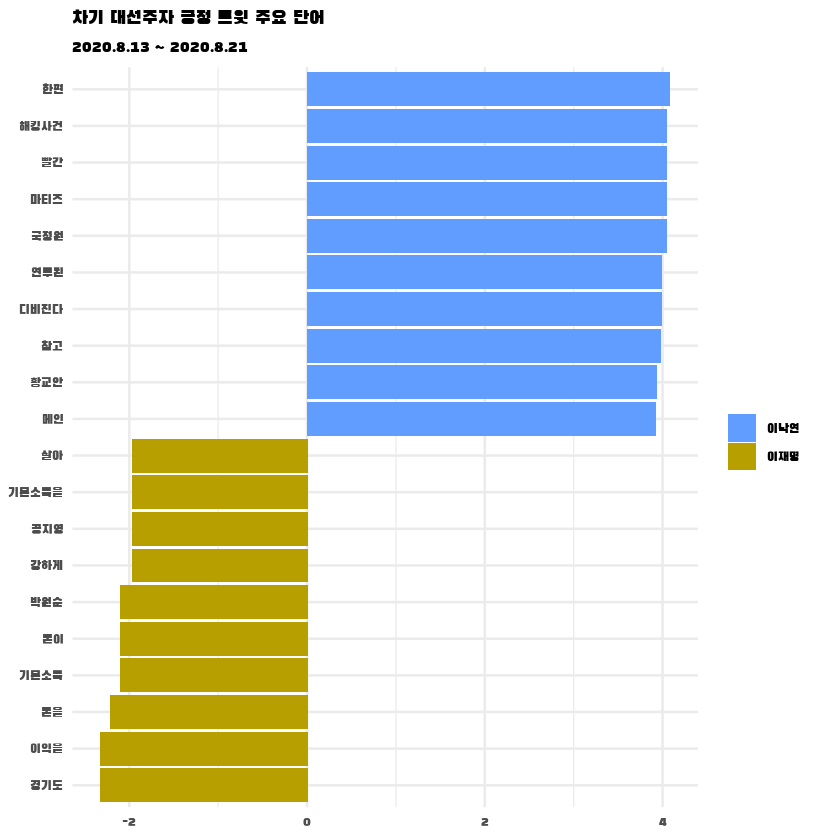

In [131]:
ggplot(top10_pos, aes(x = reorder(word, log_odds_ratio),
                      y = log_odds_ratio,
                      fill = candidate)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 긍정 트윗 주요 단어",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, fill = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12))

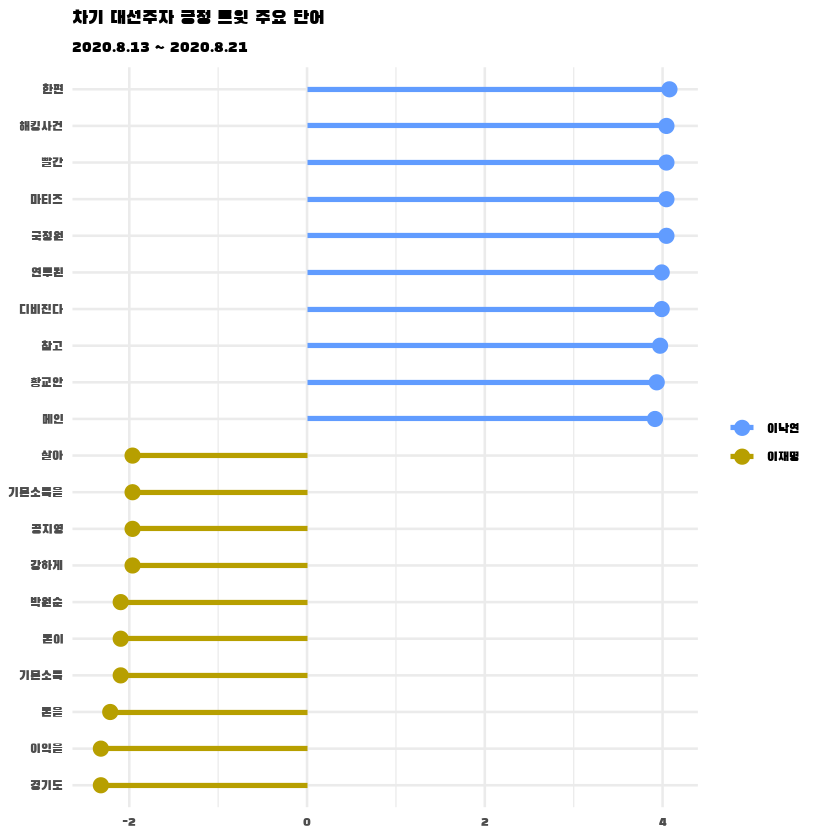

In [133]:
top10_pos <- top10_pos %>%
  ungroup() %>%
  mutate(word = reorder(word, log_odds_ratio))

ggplot(top10_pos, aes(x = word,
                      y = log_odds_ratio,
                      col = candidate)) +
  
  geom_segment(aes(x = word,
                   xend = word,
                   y = 0,
                   yend = log_odds_ratio),
               size = 1.1) +
  
  geom_point(size = 3.5) +
  coord_flip() +
  scale_color_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 긍정 트윗 주요 단어",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, col = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12)) 

In [136]:
# Wide form으로 변환
wide_neg <- frequency_sentiment %>%
  filter(sentiment == "부정" & !str_detect(word, "이낙연|이재명")) %>%
  pivot_wider(names_from = candidate,
              values_from = n,
              values_fill = list(n = 0))

# 로그 오즈비 구하기
log_odds_neg <- wide_neg %>%
  mutate(log_odds_ratio = log(((이낙연 + 1) / (sum(이낙연 + 1))) /
                              ((이재명 + 1) / (sum(이재명 + 1)))))

In [138]:
# 불용어 확인
log_odds_neg %>%
  group_by(candidate = ifelse(log_odds_ratio > 0, "이낙연", "이재명")) %>%
  slice_max(abs(log_odds_ratio), n = 15, with_ties = F) %>%
  select(word) %>%
  print(n = Inf)


# 불용어 목록 생성
stopword_neg <- c("지금껏", "겪어보지", "대충격", "시작될", "그건", "주고")

Adding missing grouping variables: `candidate`


# A tibble: 30 x 2
# Groups:   candidate [2]
   candidate word        
   <chr>     <chr>       
 1 이낙연    한편        
 2 이낙연    디비진다    
 3 이낙연    마티즈      
 4 이낙연    해킹사건    
 5 이낙연    메인        
 6 이낙연    긴급체포된다
 7 이낙연    황교안      
 8 이낙연    연루된      
 9 이낙연    서훈        
10 이낙연    이병호      
11 이낙연    빨간        
12 이낙연    국정원      
13 이낙연    참고        
14 이낙연    관심요      
15 이낙연    무섭다      
16 이재명    도지사      
17 이재명    경기도가    
18 이재명    경기도는    
19 이재명    니가        
20 이재명    뭔지        
21 이재명    이유가      
22 이재명    그건        
23 이재명    새끼야      
24 이재명    주고        
25 이재명    패륜잡범    
26 이재명    쓰나미급    
27 이재명    사이다      
28 이재명    세상        
29 이재명    쓰나미      
30 이재명    정신병원에  


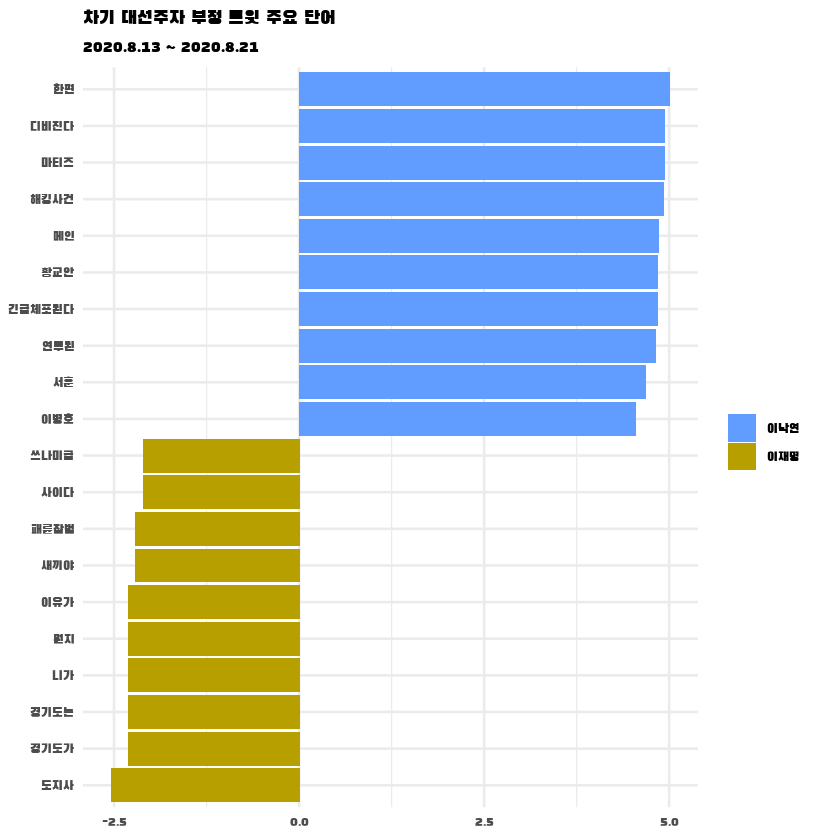

In [139]:
# 로그 오즈비 상하위 10개 단어 추출
top10_neg <- log_odds_neg %>%
  filter(!word %in% stopword_neg) %>%
  group_by(candidate = ifelse(log_odds_ratio > 0, "이낙연", "이재명")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

# 막대 그래프 생성
ggplot(top10_neg, aes(x = reorder(word, log_odds_ratio),
                      y = log_odds_ratio,
                      fill = candidate)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 부정 트윗 주요 단어",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, fill = NULL) +
  
  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12))

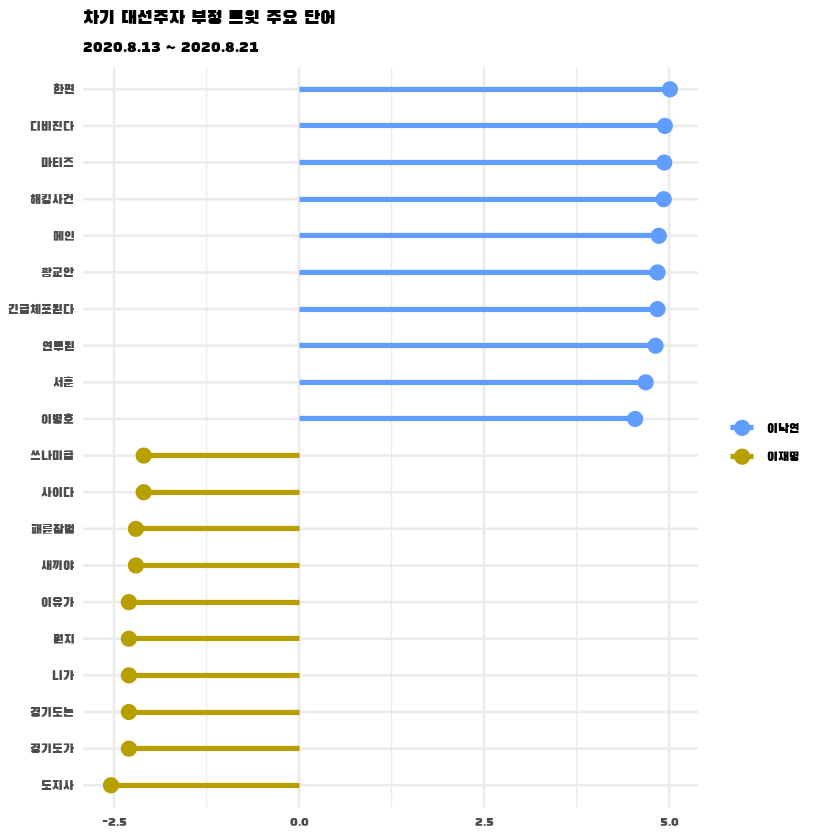

In [140]:
# 단어 순서 지정해 factor 타입으로 변환
top10_neg <- top10_neg %>%
  ungroup() %>%
  mutate(word = reorder(word, log_odds_ratio))

# 롤리팝 차트 생성
ggplot(top10_neg, aes(x = word,
                      y = log_odds_ratio,
                      col = candidate)) +
  
  geom_segment(aes(x = word,
                   xend = word,
                   y = 0,
                   yend = log_odds_ratio),
               size = 1.1) +
  
  geom_point(size = 3.5) +
  coord_flip() +
  scale_color_manual(values = col_candidate) +
  
  labs(title = "차기 대선주자 부정 트윗 주요 단어",
       subtitle = "2020.8.13 ~ 2020.8.21",
       x = NULL, y = NULL, col = NULL) +

  theme_minimal(12) +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12))